In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
import pandas as pd
df=pd.read_csv("HousePriceDataset.csv")
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,LocationScore,Price
0,1660,1,2,2,2010,1,3,369758.2
1,4572,5,3,2,1951,1,7,1011357.8
2,3892,4,1,1,1982,0,4,842272.3
3,1266,1,2,2,2021,0,10,288673.3
4,4244,4,3,2,2011,0,7,852445.4
...,...,...,...,...,...,...,...,...
4995,3506,2,1,1,1990,1,4,747305.3
4996,801,3,2,1,1978,0,9,209883.0
4997,1833,4,1,1,1986,0,3,432467.3
4998,3281,1,3,2,2005,1,2,694092.5


In [4]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,LocationScore,Price
0,1660,1,2,2,2010,1,3,369758.2
1,4572,5,3,2,1951,1,7,1011357.8
2,3892,4,1,1,1982,0,4,842272.3
3,1266,1,2,2,2021,0,10,288673.3
4,4244,4,3,2,2011,0,7,852445.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           5000 non-null   int64  
 1   Bedrooms       5000 non-null   int64  
 2   Bathrooms      5000 non-null   int64  
 3   Floors         5000 non-null   int64  
 4   YearBuilt      5000 non-null   int64  
 5   Garage         5000 non-null   int64  
 6   LocationScore  5000 non-null   int64  
 7   Price          5000 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [6]:
df.shape

(5000, 8)

In [7]:
# check for missing values
df.isnull().sum()

Area             0
Bedrooms         0
Bathrooms        0
Floors           0
YearBuilt        0
Garage           0
LocationScore    0
Price            0
dtype: int64

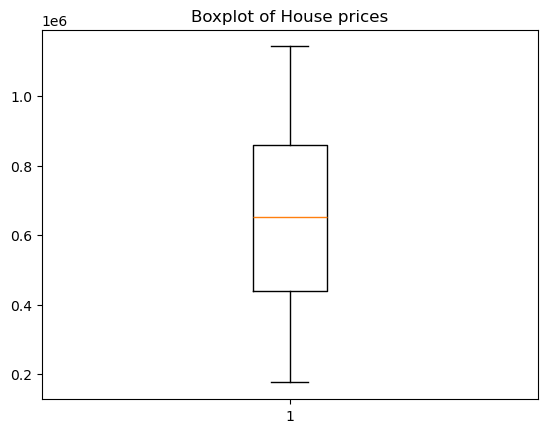

In [8]:
# outlier detection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.boxplot(df['Price'])
plt.title('Boxplot of House prices')
plt.show()

In [9]:
# Feature Target split(x and y ko separate krnay ky liyay hai)
# x = df[['Area', 'Rooms', 'Location']] or below line
x=df.drop('Price',axis=1)
y=df['Price']
x

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,LocationScore
0,1660,1,2,2,2010,1,3
1,4572,5,3,2,1951,1,7
2,3892,4,1,1,1982,0,4
3,1266,1,2,2,2021,0,10
4,4244,4,3,2,2011,0,7
...,...,...,...,...,...,...,...
4995,3506,2,1,1,1990,1,4
4996,801,3,2,1,1978,0,9
4997,1833,4,1,1,1986,0,3
4998,3281,1,3,2,2005,1,2


In [10]:
y
# prices

0        369758.2
1       1011357.8
2        842272.3
3        288673.3
4        852445.4
          ...    
4995     747305.3
4996     209883.0
4997     432467.3
4998     694092.5
4999     278687.5
Name: Price, Length: 5000, dtype: float64

In [11]:
# scaling 🔸 StandardScaler() ka use is liye hota hai:
# Taake features (jaise ke Area, Rooms, etc.) ka scale ya range same ho jaye
# Machine learning algorithms ko accurate result dene ke liye features ko same scale par lana zaroori hota hai.
# Area ki value bahut badi hai (1000s mein).
# Rooms ki value choti hai (2, 3, 4...).
# Machine learning model Area ko zyada importance de dega sirf is liye ke uski value badi hai. Isko avoid karne ke liye scaling karte hain.
# StandardScaler() kya karta hai?
# Har feature ka mean (average) zero bana deta hai.
# Har feature ka standard deviation 1 bana deta hai.
# Yeh process z-score normalization kehlata hai.
# Formula:z = (x - mean) / standard deviation
scaler=StandardScaler()       
x_scaled=scaler.fit_transform(x)

In [12]:
x_scaled

array([[-1.05599473e+00, -1.39443839e+00,  2.46594323e-04, ...,
         1.08799489e+00,  9.99200320e-01, -8.98845081e-01],
       [ 1.35797923e+00,  1.41721276e+00,  1.23321821e+00, ...,
        -1.65723448e+00,  9.99200320e-01,  4.94821220e-01],
       [ 7.94276516e-01,  7.14299976e-01, -1.23272502e+00, ...,
        -2.14825830e-01, -1.00080032e+00, -5.50428506e-01],
       ...,
       [-9.12582130e-01,  7.14299976e-01, -1.23272502e+00, ...,
        -2.87085851e-02, -1.00080032e+00, -8.98845081e-01],
       [ 2.87773052e-01, -1.39443839e+00,  1.23321821e+00, ...,
         8.55348331e-01,  9.99200320e-01, -1.24726166e+00],
       [-1.66612002e+00,  1.41721276e+00,  1.23321821e+00, ...,
        -1.00582412e+00,  9.99200320e-01, -5.50428506e-01]],
      shape=(5000, 7))

In [14]:
# 80 % Training and 20% Testing
# Aap apne data ko training aur testing parts mein divide kar rahe ho.
# x_scaled = aapke independent variables (features), jo scale kiye gaye hain.

# y = target variable (jaise ke Price).

# test_size=0.2 = 20% data testing ke liye rakha jayega, aur 80% training ke liye.

# random_state=42 = taake jab bhi code chalayen, same split ho. (Ye repeatability ke liye hota hai.)
# x_train = Features jo model ko train karne ke liye use honge.

# x_test = Features jo testing ke liye use honge (model accuracy check karne ke liye).

# y_train = Training data ke labels (actual prices).

# y_test = Testing data ke labels.
# Machine learning mein model ko train karne ke liye humein data chahiye hota hai.
# Lekin agar aap sara data train karne mein laga do, to aapko nahi pata chalega ke model real-world data par kaise perform karega.

# Is liye hum data ko do hisson mein divide karte hain:

# Training data → Model seekhta hai.

# Testing data → Model ko test karte hain, ke kitna acha seekha.

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

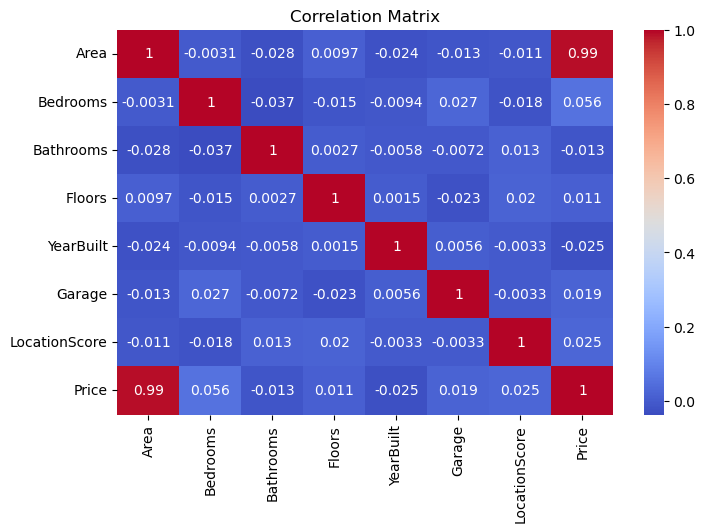

In [15]:
# correlation heatmap
# .corr() ka matlab hota hai:
# 🔍 Har column ka dusre columns ke sath correlation nikalna.
# Correlation ek statistical value hai jo batata hai:

# +1: Strong positive relationship

# -1: Strong negative relationship

# 0: No relationship
# Example: Agar Price aur Size ke darmiyan 0.85 correlation hai to iska matlab hai Price zyada hai jab Size zyada hota hai.

# sns.heatmap(..., annot=True, cmap='coolwarm')
# sns.heatmap() → ye Seaborn ka function hai jo correlation matrix ko colorful chart mein dikhata hai.

# annot=True → har cell ke andar number likha aayega (value of correlation).

# cmap='coolwarm' → color scheme ka naam hai:

# 🔵 Blue = negative correlation

# 🔴 Red = positive correlation
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

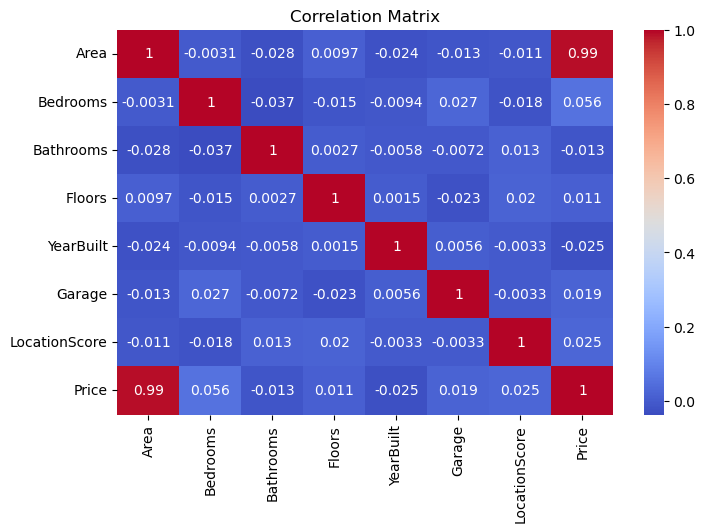

In [16]:
# correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# pairplot
# sns.pairplot(df.sample(300),diag_kind='kde')
# plt.show()

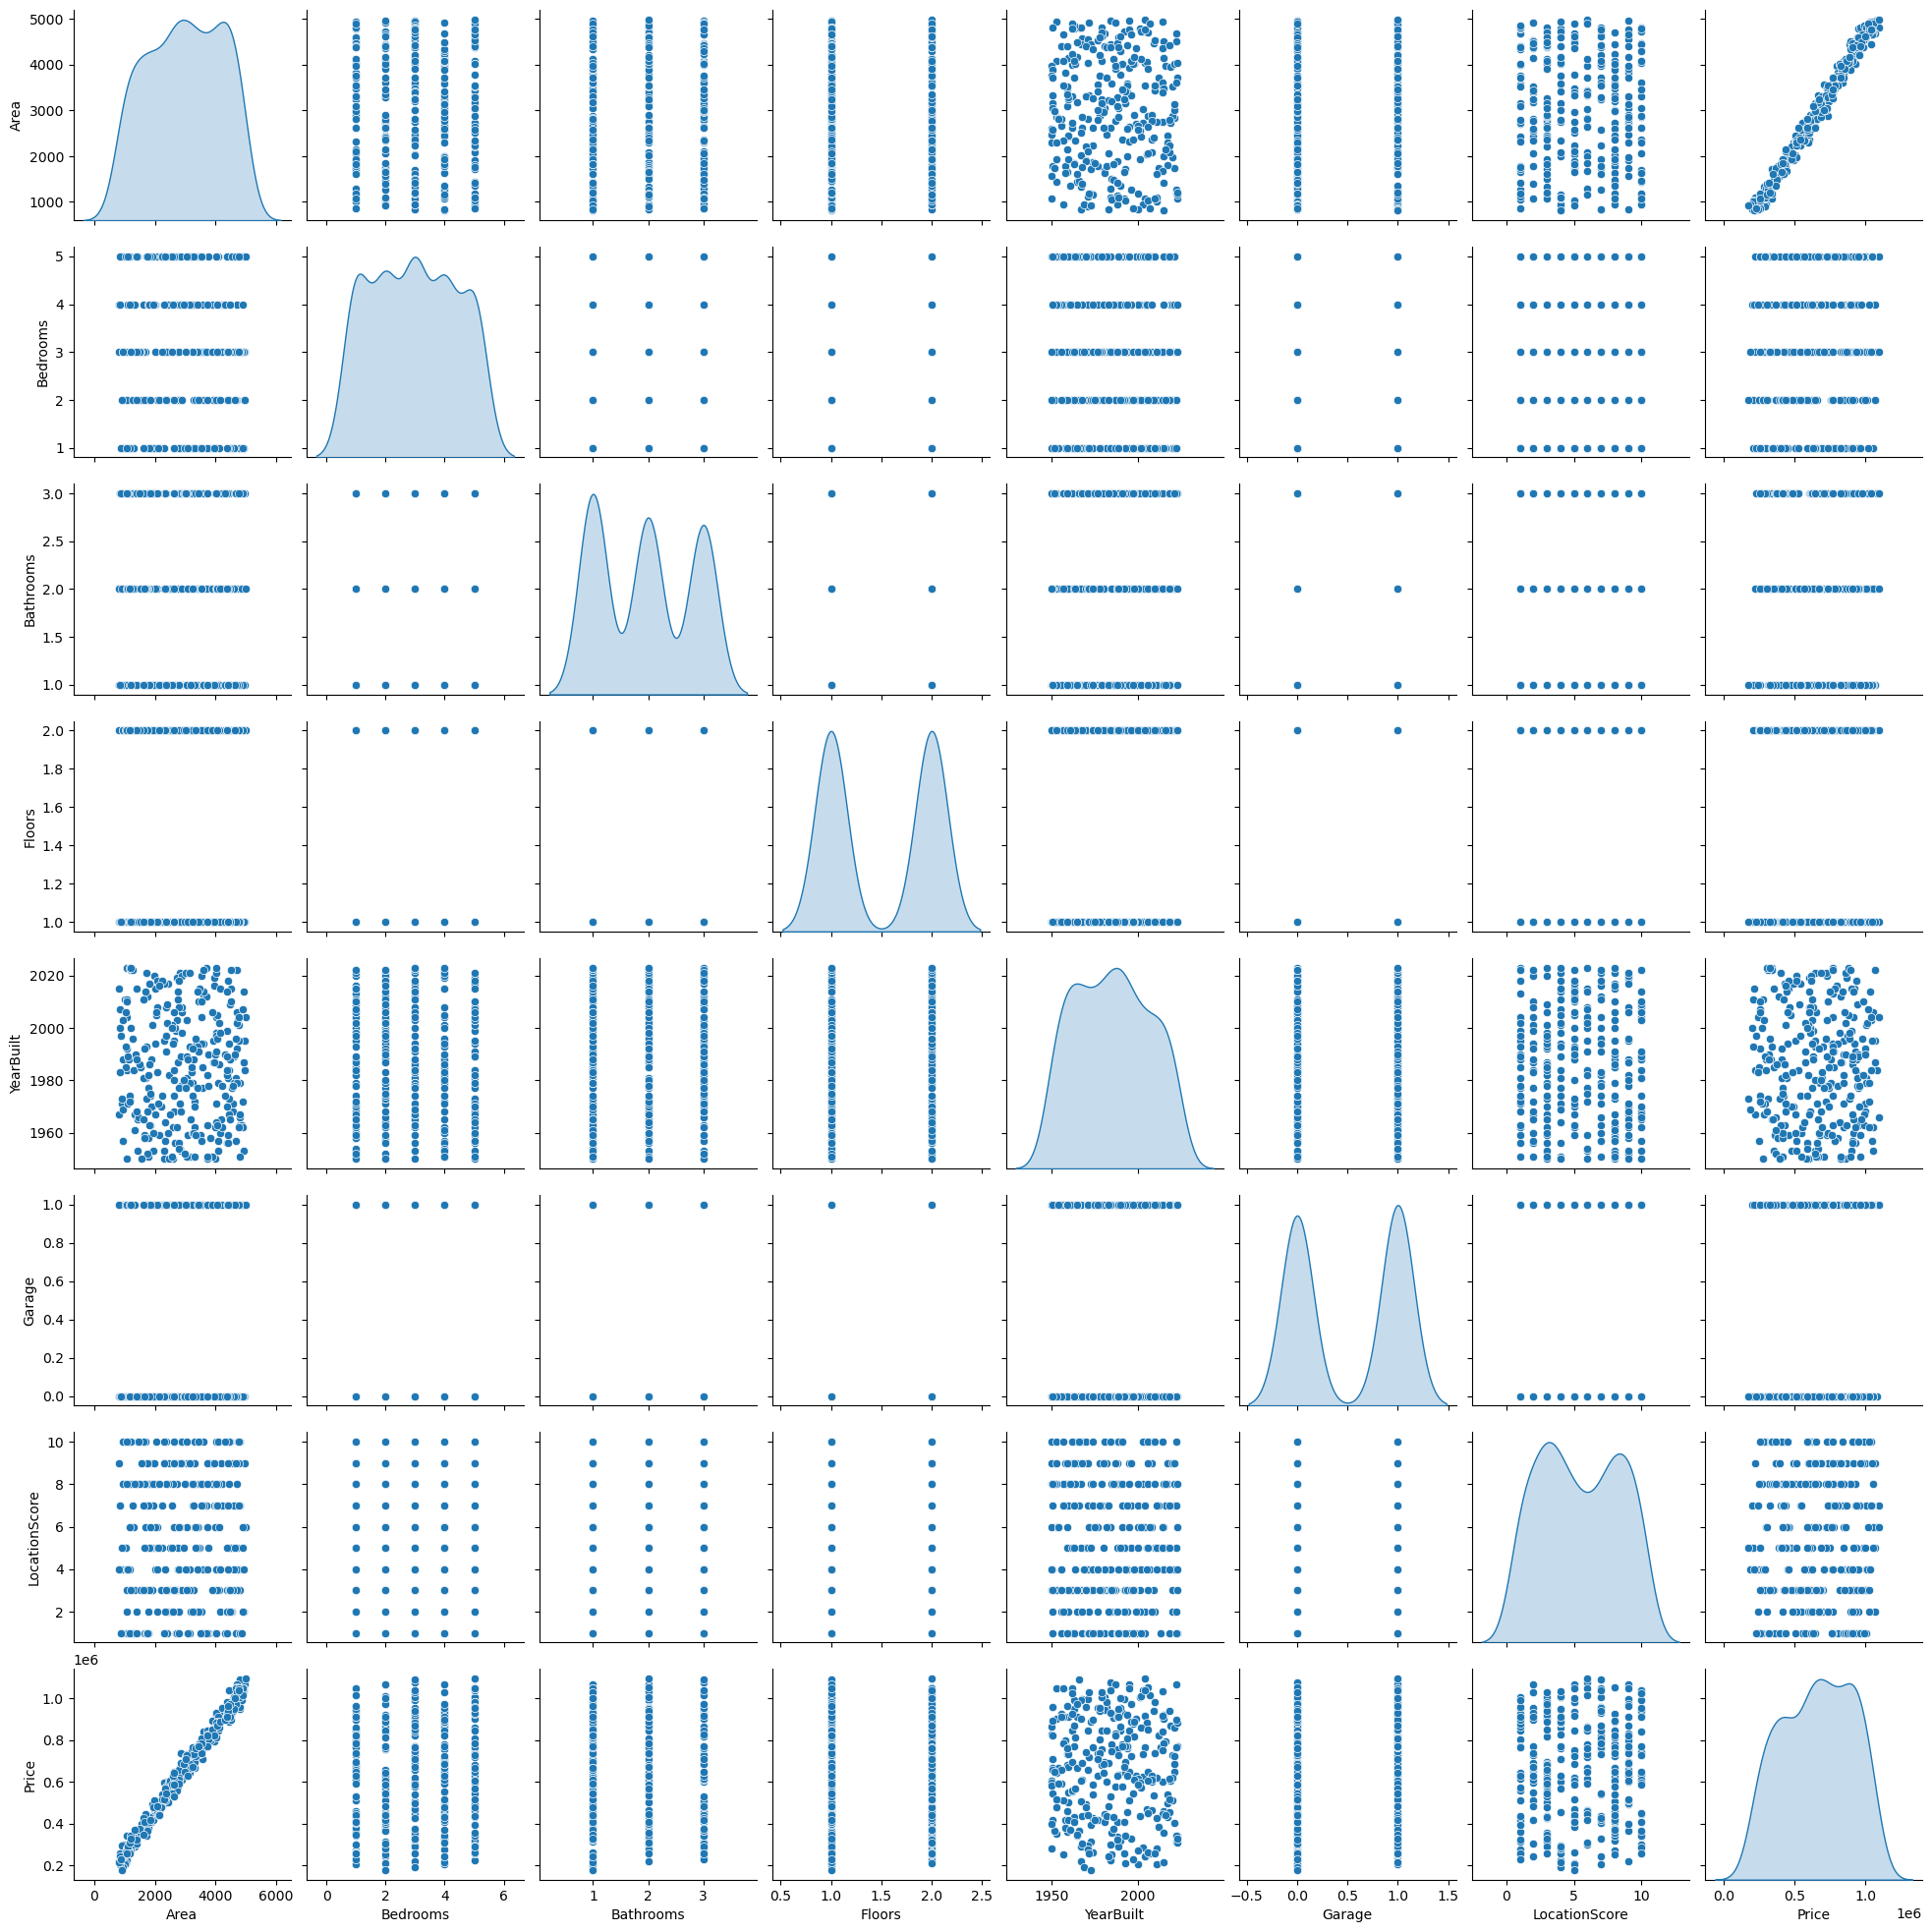

In [17]:
# pairplot
# Ye line df (DataFrame) ke andar se random 300 rows select karti hai.
# 👉 Aksar data bohat bara hota hai, to hum uska chhota sample le kar visualizations banate hain taake plotting fast aur readable ho.
# sns.pairplot(..., diag_kind='kde')
# Ye Seaborn ka powerful function hai jo pairwise relationships show karta hai:

# Har numeric column ka dusre numeric columns ke saath scatter plot banata hai.

# Diagonal (main diagonal line pe): har variable ka distribution plot dikhata hai.

# 📌 diag_kind='kde' ka matlab hai:

# Diagonal pe KDE plot (kernel density estimate) dikhayega.

# KDE plot ek smooth curve hoti hai jo data distribution batati hai (histogram ke jagah).

# Aapko ek grid of plots milegi:

# Har plot ek variable ko dusre variable ke sath compare karega.

# Jese: Price vs Size, Size vs Bedrooms, etc.

# Diagonal line pe KDE curves hongi jisme har feature ka distribution nazar aayega.

# pairplot() aapko data ke andar relationships aur patterns ko visual form mein samajhne mein madad deta hai.

# Ye plotting exploratory data analysis (EDA) ka important part hai.

# Agar features ke darmiyan clear trends ya clusters nazar aayen to wo modeling ke liye helpful hote hain.
# pairplot() ek aisi multiple graph ki grid banata hai jisme:

# Har column ko har dusre column ke saath compare kiya jata hai.

# Agar 4 numeric columns hain to 16 plots banenge (4x4).

# Isse aap data ke andar patterns, relationships, ya outliers dekh sakte ho.
# Agar aapke paas Size aur Price columns hain aur scatter plot straight line jaise lagta hai to iska matlab ho sakta hai:

# "Size badhne par Price bhi badhta hai."
#  Ye plotting exploratory data analysis (EDA) ka important part hai.
# EDA (Exploratory Data Analysis):

# Ye data science ka first step hota hai.

# Ismein aap apne data ko samajhne ke liye graphs aur summaries banate ho.

# pairplot() ismein use hota hai taake aap:

# Dekh sako kaun se features strong ya weak relation mein hain.

# Visual inspection se outliers ya anomalies pakar sako.

# Agar data ke andar non-linear ya linear trends hain to wo samajh sako
# Agar features ke darmiyan clear trends ya clusters nazar aayen to wo modeling ke liye helpful hote hain.
# Why it's important for modeling:

# Agar do variables ke darmiyan strong relationship ho, to wo machine learning model ke liye powerful feature ban sakta hai.

# Agar koi variable kisi aur ke sath bilkul random ho (no trend), to ho sakta hai wo model ke liye bekaar ho.

# Clusters ka matlab hota hai data groups mein bat gaya — ye classification ya clustering algorithms ke liye useful hota hai.
#  Example:
# Agar pairplot() se pata chalta hai ke Price aur Location_Score closely related hain, to hum is feature ko model mein zarur rakhenge.

sns.pairplot(df.sample(300),diag_kind='kde')
plt.show()

In [20]:
# Yeh do lines machine learning model banane ke basic steps hain.
model=LinearRegression()     #"Yeh hum ek Linear Regression model bana rahe hain. Yaani ek aisa model jo do ya zyada cheezon ke darmiyan seedhi line wali relationship dhoondhta hai."
model.fit(x_train,y_train)   #jo 80 percent data train ky liyay rkha us regression ky model mai fit krwa diya
# "Ab hum model ko training data dikha rahe hain — x_train (input data) aur y_train (uska jawab/result). Is process ko model ko train karna kehte hain."
# "Humne Linear Regression model banaya aur phir usko training data de kar usay sikhaya ke inputs aur output ke darmiyan kya talluq hai, taake woh future mein naye data par sahi prediction kar sake."

LinearRegression()

In [21]:
# prediction
y_pred=model.predict(x_test)   #"Hum apne trained model se x_test (naye data ya test data) ka andaza laga rahe hain, ke output kya ho sakta hai. Yeh prediction y_pred mein save ho jaye ga
# y_pred=model.predict([[1660,1,2,2,2010,1,3]])  #"Yahan hum model ko manually ek naya data point de rahe hain — jisme 1660 area hai, 1 bedroom, 2 bathrooms waghera. Model iska andaza lagata hai ke is ghar ki price kya ho sakti hai."
y_pred   #"Jab aap sirf y_pred likhte hain to woh predicted values (jo model ne andaza lagai hain) aapko dikha deta hai."
# Humne model se naye data ka andaza lagaya aur us prediction ko y_pred variable mein store kiya. Ab hum dekh sakte hain ke model ne test data ke liye kya prices predict ki hain."

array([ 636294.41828347,  573944.6103285 ,  707844.02296641,
        359656.36527797,  256200.59944115,  894446.94727123,
       1043546.71292992,  756441.65706178,  737149.85181612,
        766959.07345186,  271909.38672931,  897314.44095897,
        404667.29199497,  374127.10760351,  896601.55020856,
        546073.17580911,  357216.96557333,  565203.08285918,
       1030166.34685919,  573317.06631815,  947642.64247972,
       1000295.51123341,  661488.7168238 ,  629528.44464502,
        577883.00813622,  506940.94663751,  758696.63343734,
        909000.1712229 ,  591178.64024027, 1039522.21537745,
        866206.8840143 ,  792649.33258108,  848996.52026972,
        878758.1499396 ,  819680.02358404,  590834.58240966,
        642586.77071339,  635866.10525743,  462352.83280385,
        987283.09743426,  730113.37398574,  538176.4295247 ,
        860554.22225199,  290598.51350175, 1043340.89358313,
        536045.11731154,  291424.10509754,  818247.09908874,
        641946.34769963,

In [23]:
# user input for prediction
def predict_house_price():
    print("\n Enter the house features to predict the price:")
    area=float(input("Area in sq ft"))
    bedrooms=int(input("bedrooms(1-5)"))
    bathrooms=int(input("bathroom(1-3)"))
    floor=int(input("floor(1-2)"))
    year=int(input("year built(1950-2023)"))
    garage=int(input("1=yes,0=no"))
    location=int(input("location score(1-10)"))
    user_input=pd.DataFrame([[area,bedrooms,bathrooms,floor,year,garage,location]],columns=x.columns)
# columns = x.columns ka matlab hai ke user ka input bilkul usi structure mein ho jaise x (training features) ka structure hai — taake model confusion na ho aur prediction sahi ho.
# When you take input from the user, you must give exactly the same structure (same number of features and same column names) as x.
# So columns=x.columns ensures that your user_input DataFrame looks identical to the training data, just with one row (the user's input).
    # scale input features
    user_scaled=scaler.transform(user_input)      #Input features are scaled using the same StandardScaler used during model training (important for consistency).
    # predict price
    predicted_price = model.predict(user_scaled)[0]   #The [0] at the end gets the first (and only) prediction value from the result.
#[0] ka matlab hai: array ka pehla element lena.
#Model aik list deta hai, aur [0] se us list ka pehla (aur akela) price nikalte hain.
#     model.predict(user_scaled) returns a NumPy array of predictions.
# For example: array([245000.567])
# Even though you're predicting for just one house, it still returns a list/array.
# [0] accesses the first element of that array — the actual predicted price.
    print(f"\n Predicted House Price:${predicted_price:,.0f}")
# call the prediction function
predict_house_price()


 Enter the house features to predict the price:


Area in sq ft 1600
bedrooms(1-5) 3
bathroom(1-3) 2
floor(1-2) 1
year built(1950-2023) 2015
1=yes,0=no 1
location score(1-10) 8



 Predicted House Price:$397,925


In [47]:
# Evaluation
y_pred=model.predict(x_test)
print("MSE:", mean_squared_error(y_test,y_pred))
print("R^2 Score:",r2_score(y_test,y_pred))
# MSE batata hai ke prediction aur asli value mein average error kitna hai.Lower is better. A perfect model has MSE = 0.

# R² Score batata hai ke model kitni accuracy se predict kar raha hai (0 se 1 tak scale par).Measures how well the model explains the variability of the target variable.

# Ranges from 0 to 1 (can also be negative if the model is worse than guessing).

# Closer to 1 means a better fit.

MSE: 588697300.0750788
R^2 Score: 0.9899136800135677


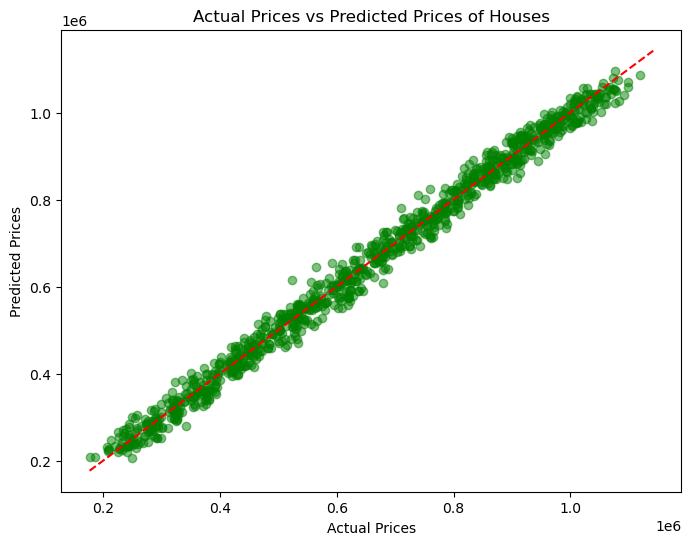

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5,color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices of Houses')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'--r')  #This draws a red dashed reference line showing where the predicted price = actual price.If a point lies on this line, the model's prediction was perfect for that house.
plt.show()
# Ye graph dikhata hai ke model ne actual house price ke muqablay mein kitna sahi predict kiya. Agar sab points red line ke paas hain, to model strong hai.

